<h1>Impact Analysis</h1>

<h3>Importpath</h3>

Add Projectfolder to Importpath

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
cwd = os.path.abspath(".")
sys.path.insert(0, cwd.replace("Notebook", "Code"))

sys.path

['/home/avatar/Dokumente/Projekte/Python/EconomicCalendarImpactAnalysis/Code',
 '/home/avatar/Dokumente/Projekte/Python/EconomicCalendarImpactAnalysis/Notebook',
 '/home/avatar/.pyenv/versions/3.10.13/lib/python310.zip',
 '/home/avatar/.pyenv/versions/3.10.13/lib/python3.10',
 '/home/avatar/.pyenv/versions/3.10.13/lib/python3.10/lib-dynload',
 '',
 '/home/avatar/.local/lib/python3.10/site-packages',
 '/home/avatar/.pyenv/versions/3.10.13/lib/python3.10/site-packages']

<h3>Imports</h3>

In [2]:
import analyst as al
import plotly.express as px

<h3>Impact Analysis</h3>

Initiate Analyst and make Impact Analysis Frame for futher analysis

In [32]:
analyst = al.Analyst(source="Dukascopy")
orginal_frame = analyst.impact_analysis()
clean_frame = analyst.postprocess_impact_frame(orginal_frame)

Get FX Price: Timestamp 2023-12-28 13:30:00+00:00, Pair EURUSD, Price open, Source Dukascopy
Try to call InfluxDB for Price Data, Result                               source  symbol timeframe    close     high  \
timestamp                                                                  
2023-12-28 13:30:00+00:00  Dukascopy  EURUSD      1min  1.11166  1.11178   

                               low     open  
timestamp                                    
2023-12-28 13:30:00+00:00  1.11116  1.11124  
Get FX Price: Timestamp 2023-12-22 15:00:00+00:00, Pair EURUSD, Price open, Source Dukascopy
Try to call InfluxDB for Price Data, Result                               source  symbol timeframe    close     high  \
timestamp                                                                  
2023-12-22 15:00:00+00:00  Dukascopy  EURUSD      1min  1.10358  1.10385   

                               low     open  
timestamp                                    
2023-12-22 15:00:00+00:00  1.10344  1.

In [33]:
positiv_clean_frame = clean_frame[clean_frame["deviation"] > 0]

positiv_clean_frame["original impact"]

timestamp
2023-12-28 13:30:00+00:00     3.779562
2023-12-22 15:00:00+00:00    -0.271835
2023-12-20 15:00:00+00:00    -5.925143
2023-12-08 15:00:00+00:00    11.259585
2023-12-05 15:00:00+00:00    23.868777
                               ...    
2023-01-27 15:00:00+00:00    -1.012388
2023-01-27 13:30:00+00:00     2.760321
2023-01-26 13:30:00+00:00   -13.857406
2023-01-18 13:30:00+00:00    20.846593
2023-01-13 20:00:00+00:00    -0.646412
Name: original impact, Length: 65, dtype: float64

In [17]:
positiv_clean_frame["Pips"] = (positiv_clean_frame["price now close"] - positiv_clean_frame["price now open"]) * 10000

/tmp/ipykernel_1195870/3126663399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positiv_clean_frame["Pips"] = (positiv_clean_frame["price now close"] - positiv_clean_frame["price now open"]) * 10000


In [19]:
data = positiv_clean_frame[positiv_clean_frame["event"] == "Core Inflation Rate YoY"]

In [23]:
data[["deviation", "original impact"]]

,deviation,original impact
timestamp,,
2023-12-12 13:30:00+00:00,0.00,0.092604
2023-07-12 16:30:00+00:00,-0.04,1.443744
2023-06-13 16:30:00+00:00,0.00,2.684365
2023-03-14 16:30:00+00:00,0.00,0.932775
2023-01-12 18:30:00+00:00,0.00,0.184939


In [40]:
group_frame = positiv_clean_frame.groupby("event")["original impact"]

group_frame

In [41]:
group1 = group_frame.get_group("GDP Growth Rate QoQ Adv")
group2 = group_frame.get_group("ISM Non-Manufacturing PMI")
group3 = group_frame.get_group("Non Farm Payrolls")

<Axes: ylabel='Frequency'>

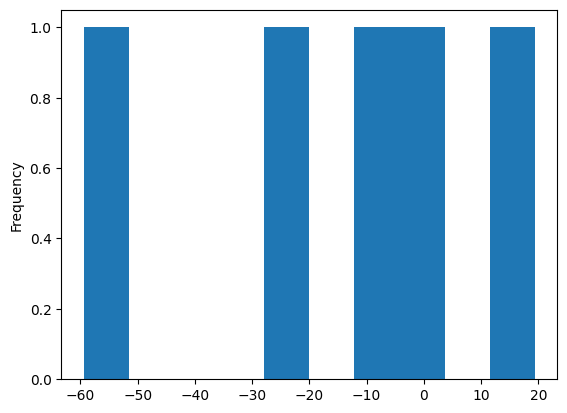

In [44]:
group3.plot.hist()

In [35]:
clean_frame[["event","deviation","original impact"]].to_html("Impact Frame.html")

In [ ]:
grouped = clean_frame.groupby("event")
group = grouped.get_group("PPI MoM")

group

In [ ]:
fig = px.scatter(group , x="deviation", y=["original impact", "first impact", "second impact", "third impact"])
fig.show()

<h3>Regression Analysis</h3>

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
print(analyst.regression_analysis(model, group["deviation"], group["first impact"]))

<h3>Regression Frame</h3>

In [36]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import analyst as al

In [ ]:
analyst = al.Analyst()
raw_impact_frame = analyst.new_impact_analysis()
impact_frame = analyst.postprocess_impact_frame(raw_impact_frame)
reg_frame = analyst.make_regression_frame(impact_frame)

reg_frame

In [ ]:
analyst = al.Analyst()
raw_impact_frame = analyst.new_impact_analysis()
raw_impact_frame


In [37]:
reg_frame = analyst.make_regression_frame(positiv_clean_frame)

/home/avatar/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/avatar/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/avatar/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/avatar/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/home/avatar/.pyenv/versions/3.10.13/lib/python3.10/site-packages/sklearn/metric

In [38]:
reg_frame

,Count,CoD Original Impact,CoD First Impact,CoD Second Impact,CoD Third Impact,CoD One Hour Impact,CoD Tow Hour Impact,CoD Three Hour Impact
Goods Trade Balance,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Michigan Consumer Sentiment,15,0.000002,0.092970,0.059634,0.341966,0.226869,0.010355,0.094265
CB Consumer Confidence,7,0.405365,0.281503,0.019068,0.158085,0.003128,0.082494,0.002498
ISM Services PMI,4,0.413001,0.179735,0.388322,0.524916,0.573141,0.519088,0.384762
Durable Goods Orders MoM,5,0.158762,0.150731,0.210072,0.267997,0.149306,0.041536,0.072315
Building Permits,5,0.021836,0.158158,0.196994,0.013416,0.042377,0.027787,0.040254
Retail Sales MoM,4,0.001995,0.125470,0.196958,0.489083,0.393373,0.001509,0.010907
PPI MoM,6,0.690628,0.409688,0.424722,0.061866,0.101345,0.168694,0.412370
Non Farm Payrolls,5,0.994496,0.127497,0.000021,0.445497,0.127078,0.557547,0.204403
ISM Manufacturing PMI,3,0.159275,0.375573,0.754220,0.531463,0.598369,0.144075,0.272729
